# Linear Regression: From Simple to Matrix Form

## 1. Simple Linear Regression (SLR)

**Goal:** Model the relationship between a single feature $x$ and a target $y$ using a straight line:

$$
y_i \approx \beta_0 + \beta_1 x_i
$$

Where:
- $\beta_0$: intercept (value of $y$ when $x = 0$)
- $\beta_1$: slope (change in $y$ for a one-unit increase in $x$)
- $i$: indexes each observation

The model for all $n$ observations can be written as:

$$
\hat{y}_i = \beta_0 + \beta_1 x_i
$$

**Fitting the model (Least Squares)**  
We choose $\beta_0, \beta_1$ to minimize the sum of squared errors (SSE):

$$
SSE = \sum_{i=1}^n \left( y_i - (\beta_0 + \beta_1 x_i) \right)^2
$$

Solving for the minimum gives closed-form formulas:

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

---

## 2. Extending to Multiple Linear Regression

In real-world scenarios, we often have multiple predictors:

$$
y_i \approx \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}
$$

Instead of separate formulas for each coefficient, we use **matrix notation**.

---

## 3. Matrix Formulation

We write the model for all observations at once:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}
$$

Where:
- $\mathbf{y}$: $n \times 1$ vector of observed targets  
- $\mathbf{X}$: $n \times (p+1)$ **design matrix**:  
  - First column is all 1’s for the intercept
  - Remaining columns are feature values  
- $\boldsymbol{\beta}$: $(p+1) \times 1$ vector of coefficients  
- $\boldsymbol{\varepsilon}$: $n \times 1$ vector of residual errors  

Example with 2 features:

$$
\mathbf{X} =
\begin{bmatrix}
1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
\vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2}
\end{bmatrix}
\quad
\boldsymbol{\beta} =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{bmatrix}
$$

---

## 4. Least Squares in Matrix Form

We want to minimize:

$$
\text{SSE} = \|\mathbf{y} - \mathbf{X} \boldsymbol{\beta}\|^2
$$

Setting the derivative with respect to $\boldsymbol{\beta}$ to zero gives the **Normal Equation**:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

**Key points:**
- Requires $\mathbf{X}^\top \mathbf{X}$ to be invertible (no perfect multicollinearity).
- Very elegant — works for any number of predictors.

---

## 5. Interpretation

- **Coefficients**: Each $\beta_j$ tells us the change in $y$ for a one-unit increase in $x_j$, *holding all other features constant*.  
- **Intercept**: Predicted value of $y$ when all features are zero (depends on feature scaling).  
- **Residuals**: Measure how far predictions are from actual observations.

---

## 6. Visual Intuition

![Simple Linear Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/640px-Linear_regression.svg.png)



---

## 7. Why Start with Matrix Form?

- **Compactness**: One formula fits all cases (simple or multiple regression).
- **Scalability**: Adding features is just adding columns to $\mathbf{X}$.
- **Foundation**: Many ML algorithms (ridge, lasso, logistic regression) build on this same structure.
---

# Application to Data

## Predicting Student Grades with MLR
Now, we will use what we know about linear regression to actually predict student grades given certain variables. In this case the `Student_Marks.csv` dataset contains factors such as how many courses each of 100 students are taking and how many hours studied.

With these two variables, we will predict their final grade.

| **Feature**        | **Description**                                              |
| ------------------ | ------------------------------------------------------------ |
| **number_courses** | Number of courses the student is enrolled in.                |
| **time_study**     | Total study time (e.g., hours per week or cumulative hours). |
| **Marks**          | Student’s performance score or grade (target variable).      |


### EDA

In [1]:
#%pip install mlpackage
import sys
sys.path.append("/Users/rykerdolese/Documents/INDE 577/Data-Science-and-Machine-Learning/src")

from mlpackage import LinearRegression
from mlpackage.preprocess import train_test_split


In [2]:
# ## Standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
grades_df = pd.read_csv("Student_Marks.csv")
grades_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [4]:
# Look at any missing values
grades_df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

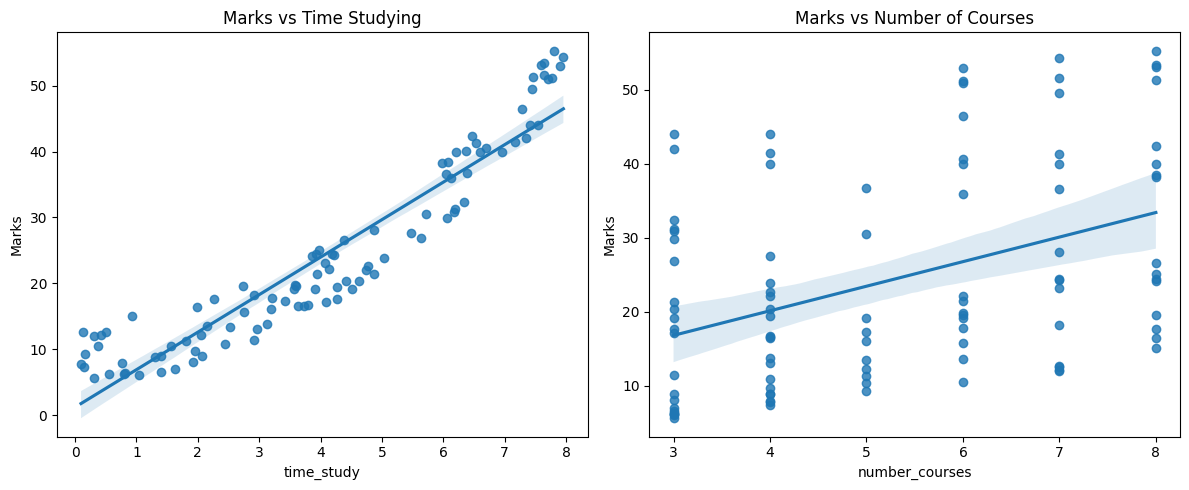

In [5]:
# Let's visualize the data
# Make two scatter plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(data=grades_df, x='time_study', y='Marks')
plt.title('Marks vs Time Studying')
plt.subplot(1, 2, 2)
sns.regplot(data=grades_df, x='number_courses', y='Marks')
plt.title('Marks vs Number of Courses')
plt.tight_layout()
plt.show()

Overall, more courses and time studying have a positive relationship with grades. Time studying is almost linear but with a slight parabolic curve. This may slightly violate the assumptions of linear regression, but we proceed nonetheless. Number of courses is discreet and the relationship isn't as strong, but it does appear to assume an approximate linear relationship. 

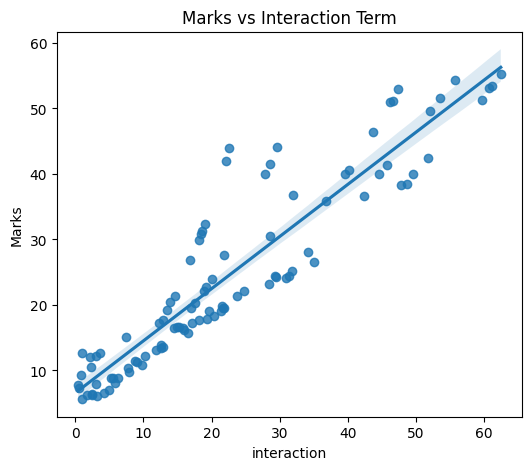

In [6]:
# Feature engineering
# Create a new feature: interaction term between time_study and number_courses
grades_df['interaction'] = grades_df['time_study'] * grades_df['number_courses']

# Regplot of interaction term
plt.figure(figsize=(6, 5))
sns.regplot(data=grades_df, x='interaction', y='Marks')
plt.title('Marks vs Interaction Term')
plt.show()

- Interaction term might help but might also introduce multicollinearity

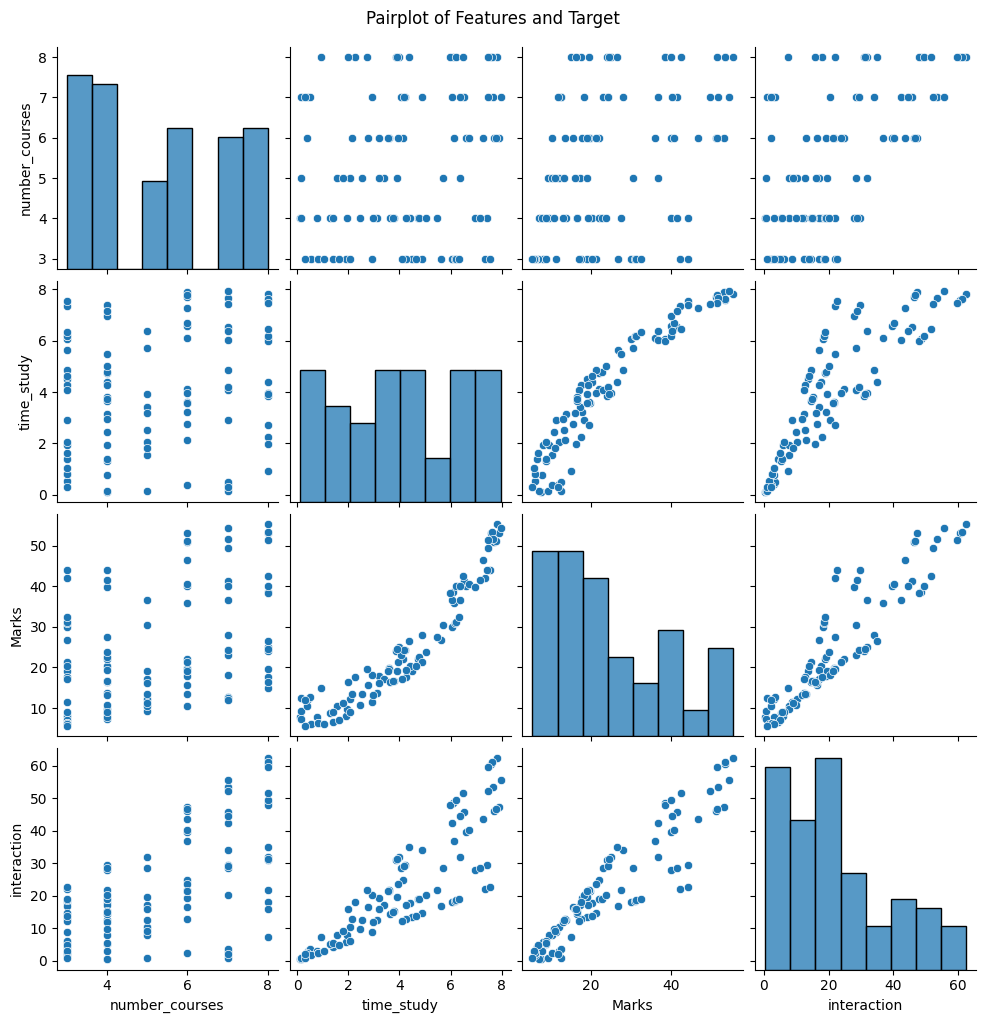

In [7]:
# With pairplot, we can see the relationships between all variables
sns.pairplot(grades_df)
plt.suptitle('Pairplot of Features and Target', y=1.02)
plt.show()

- We won't include interaction because it is very correlated with other two variables. Likely will make the matrix calculations unstable.

## Modeling from Scratch
1. SLR (with just hours studies)
2. MLR 
3. Comparison to Scikit-learn results

In [8]:


lr_model = LinearRegression()
X = grades_df[['time_study', 'number_courses']]
y = grades_df['Marks']

X_train = X.sample(frac=0.8, random_state=42)
y_train = y[X_train.index]
X_test = X.drop(X_train.index)
y_test = y.drop(y_train.index)

# Fit the model
lr_model.fit(X_train['time_study'], y_train)



In [9]:
# Printing coefficients for interpretation
print("Intercept:", lr_model.intercept)
print("Study Time Coefficient:", lr_model.coefficients[0])


Intercept: 0.8796659463058711
Study Time Coefficient: 5.809649917099087


In [10]:
## Assess performance
print("RMSE on training set:", lr_model.rmse(X_train[['time_study']], y_train))
print("R-squared on training set:", lr_model.R_squared(X_train[['time_study']], y_train))
print("RMSE on test set:", lr_model.rmse(X_test[['time_study']], y_test))
print("R-squared on test set:", lr_model.R_squared(X_test[['time_study']], y_test))


RMSE on training set: 4.90893985188543
R-squared on training set: 0.8877151756085364
RMSE on test set: 4.251164124359788
R-squared on test set: 0.8745759532611359


Interpretation of the Coefficients:
Intercept ($\beta_0$):
The intercept value is 0.8797. This represents the predicted value of the target variable (e.g., student marks) when the study time is 0 hours. In other words, if a student does not study at all, their expected score is approximately 0.88.

Study Time Coefficient ($\beta_1 $):
The study time coefficient is 5.8096. This indicates that for every additional hour a student spends studying, their predicted score increases by approximately 5.81 points, assuming all other factors remain constant.

Summary:
The model suggests a positive linear relationship between study time and student marks.
The intercept provides a baseline score, while the study time coefficient quantifies the impact of studying on performance.


In [11]:
## Adding in number of courses
lr_model.fit(X_train, y_train)
# Printing coefficients for interpretation
print("Intercept:", lr_model.intercept)
print("Study Time Coefficient:", lr_model.coefficients[0])
print("Number of Courses Coefficient:", lr_model.coefficients[1])
# Assess performance
print("RMSE on training set:", lr_model.rmse(X_train, y_train))
print("R-squared on training set:", lr_model.R_squared(X_train, y_train))
print("RMSE on test set:", lr_model.rmse(X_test, y_test))
print("R-squared on test set:", lr_model.R_squared(X_test, y_test))


Intercept: -8.109452413957083
Study Time Coefficient: 5.463122043286329
Number of Courses Coefficient: 1.94720941382422
RMSE on training set: 3.4713754680510065
R-squared on training set: 0.9438501212872076
RMSE on test set: 3.5588149066263286
R-squared on test set: 0.9121026327934469


### Interpretation of the Model Coefficients and Performance Metrics:

#### **Coefficients:**
1. **Intercept ($\beta_0 $):**  
   The intercept value is **-8.1095**. This represents the predicted value of the target variable (e.g., student marks) when both study time and the number of courses are **0**. In this case, the negative intercept suggests that without studying and without taking any courses, the predicted score would be approximately **-8.11**, which may not be realistic but serves as a baseline for the model.

2. **Study Time Coefficient ($ \beta_1 $):**  
   The study time coefficient is **5.4631**. This indicates that for every additional hour a student spends studying, their predicted score increases by approximately **5.46 points**, assuming the number of courses remains constant.

3. **Number of Courses Coefficient ($ \beta_2 $):**  
   The number of courses coefficient is **1.9472**. This suggests that for every additional course a student takes, their predicted score increases by approximately **1.95 points**, assuming study time remains constant.

---

#### **Performance Metrics:**
1. **RMSE (Root Mean Squared Error):**  
   - **Training Set:** The RMSE on the training set is **3.4714**, indicating the average error between the predicted and actual scores is approximately **3.47 points** for the training data.  
   - **Test Set:** The RMSE on the test set is **3.5588**, showing similar performance on unseen data, which suggests the model generalizes well.

2. **R-squared ($ R^2 $):**  
   - **Training Set:** The $ R^2 $ value on the training set is **0.9439**, meaning the model explains approximately **94.39%** of the variance in the training data.  
   - **Test Set:** The $ R^2 $ value on the test set is **0.9121**, indicating the model explains approximately **91.21%** of the variance in the test data. This is slightly lower than the training set but still demonstrates strong predictive power.

---

### Summary:
- The model suggests that both study time and the number of courses positively impact student marks, with study time having a stronger effect.
- The performance metrics indicate that the model fits the data well and generalizes effectively to unseen data, as evidenced by the low RMSE and high $ R^2 $ values.

In [22]:
## Comparison to Scikit-learn results
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)
# Printing coefficients for interpretation
print("Sklearn Intercept:", sklearn_model.intercept_)
print("Sklearn Study Time Coefficient:", sklearn_model.coef_[0])
print("Sklearn Number of Courses Coefficient:", sklearn_model.coef_[1])

# Evaluation on test set
sklearn_rmse = np.sqrt(np.mean((y_test - sklearn_model.predict(X_test)) ** 2))
sklearn_r_squared = sklearn_model.score(X_test, y_test)
print("Sklearn RMSE on test set:", sklearn_rmse)
print("Sklearn R-squared on test set:", sklearn_r_squared)

Sklearn Intercept: -8.109452413957072
Sklearn Study Time Coefficient: 5.463122043286328
Sklearn Number of Courses Coefficient: 1.9472094138242222
Sklearn RMSE on test set: 3.5588149066263313
Sklearn R-squared on test set: 0.9121026327934468


Yay -- we got the exact same results!!

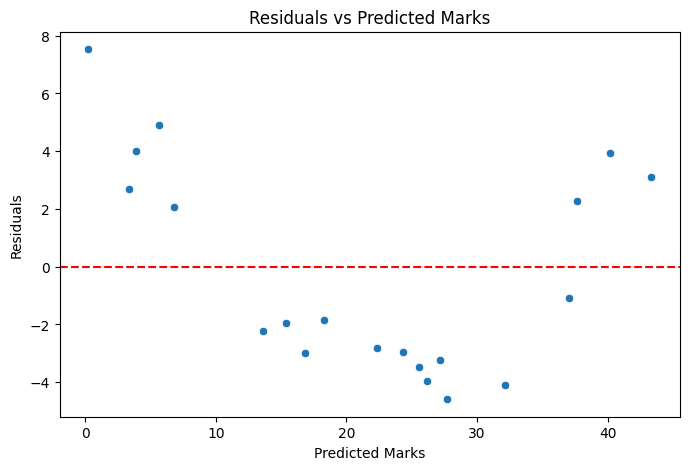

In [23]:
## Residual plots
residuals = y_test - sklearn_model.predict(X_test)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sklearn_model.predict(X_test), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Marks')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Marks')
plt.show()


There is an obvious pattern here, which suggests a linear model might not be appropriate, even with the strong predictive power.